# 勾配法

モデルのパラメータ$w=(w_0, ..., w_d)^\top$を変えて誤差関数$L(w)$を最小化する問題

$$
\min_{w} L(w)
$$

を考える。

**勾配法**あるいは**勾配降下法**（gradient descent method）は勾配を用いる最適化手法の総称である。

基本的に反復計算によって徐々に勾配を下っていき最適化を行う。$t$回目の反復における点$x_t$について、探索方向$d_t$とステップ幅$\alpha_t$を用いて

$$
x_{t+1} = x_t + \alpha_t d_t
$$

という更新を反復していく

## 最急降下法

最急降下法（steepest descent method）は負の勾配$-\nabla f(x) = -\frac{\partial f(x)}{\partial x}$の方向に$x$を更新して最適化していく。

つまり探索方向$d_t = -\nabla f(x)$ということである。

ステップ幅$\alpha_t$は固定値で行う方法もあるし、動的に変化させる方法もある。

$t+1$回目の反復（iteration）における$x$は

$$
x_{t+1} = x_t - \alpha_t \nabla f(x_t)
$$

のように算出される


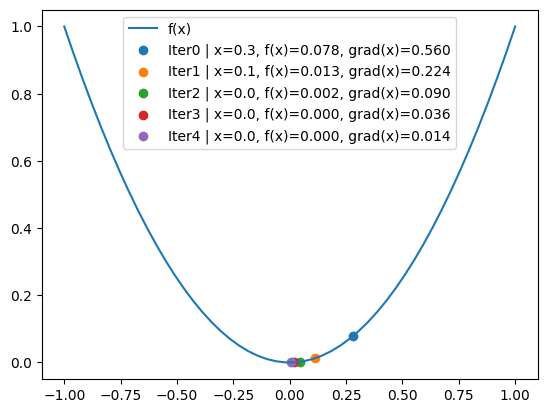

In [78]:
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return x ** 2

def grad(x):
    return 2 * x

fig, ax = plt.subplots()
x = np.linspace(-1, 1)
ax.plot(x, f(x), label="f(x)")

x = 0.7
eta = 0.3
for i in range(5):
    x = x - eta * grad(x)
    ax.scatter(x, f(x), label=f"Iter{i} | x={x:.1f}, f(x)={f(x):.3f}, grad(x)={grad(x):.3f}")
ax.legend()
fig.show()

In [79]:
# 機械学習っぽい想定をしたバージョン
import numpy as np

np.random.seed(0)
w_true = np.array([3])
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
e = np.random.normal(scale=0.1, size=X.shape[0]).round(1)
y_true = X @ w_true + e


def model(w): # linear model
    return X @ w

def loss(y_true, y_pred): # squared loss
    return (1/2) * (y_true - y_pred)**2

def grad(y_true, y_pred):
    return (y_true - y_pred)


w = np.random.normal(size=X.shape[1]) # initialize
eta = 0.1
for i in range(5):  # 本当はLossが一定値未満になるまでwhileでループする
    y_pred = model(w)
    print(f"""
Iteration {i}
    MSE = {np.mean(loss(y_true, y_pred)):.3f}
    gradients for each sample = {grad(y_true, y_pred).round(1)}
""".strip())

    # update
    w = w + eta * sum(grad(y_true, y_pred))

print(f"""
Final Model:
    estimated weights: {w}
    true weights: {w_true}
    predicted values : {model(w).round(1)}
    true target values: {y_true.round(1)}
""")

Iteration 0
    MSE = 88.846
    gradients for each sample = [ 4.2  8.  12.  16.1 20.1]
Iteration 1
    MSE = 22.375
    gradients for each sample = [ -1.9  -4.1  -6.1  -8.  -10.1]
Iteration 2
    MSE = 5.516
    gradients for each sample = [1.2 1.9 3.  4.  5. ]
Iteration 3
    MSE = 1.422
    gradients for each sample = [-0.3 -1.1 -1.5 -2.  -2.5]
Iteration 4
    MSE = 0.338
    gradients for each sample = [0.4 0.4 0.7 1.  1.2]

Final Model:
    estimated weights: [3.17241493]
    true weights: [3]
    predicted values : [ 3.2  6.3  9.5 12.7 15.9]
    true target values: [ 3.2  6.   9.1 12.2 15.2]



## ニュートン法

ニュートン法（Newton's method）は勾配だけでなくヘッセ行列の情報も用いる。ステップ幅は固定である

- 探索方向$d_t = - (\nabla^2 f(x_t))^{-1} \nabla f(x_t)$
- ステップ幅$\alpha_t = 1$

$$
x_{t+1} = x_t -  (\nabla^2 f(x_t))^{-1} \nabla f(x_t)
$$

テイラーの定理（テイラー展開）で2次まで使ったときの最適解が上記の探索方向となる


### 導出（$x$がスカラーの場合）

（局所）最適解は

$$
f'(x) = \frac{d}{d x} f(x) = 0
$$

を満たす。$f'(x)$を$x=x_t$の周りでテーラー展開すると

$$
0 = f'(x) = f'(x_t) + f''(x_t) (x - x_t) + O(1)
$$

となり、これを整理すると

$$
x = x_t + \frac{ f'(x_t) }{ - f''(x_t) } + O(n^{-1})
$$

となる。

よって

$$
x_{t+1} = x_t - \frac{ f'(x_t) } { f''(x_t) }
$$

のように更新していく

:::{note} テイラーの定理
$\def\R{\mathbb{R}} \def\b#1{\boldsymbol{#1}}$
関数$f: \R^n \to \R$が1回微分可能のとき、$\b{x}, \b{\delta} \in \R^n$に対して実数$c\in (0, 1)$が存在して

$$
f(\b{x} + \b{\delta}) = f(\b{x}) + \nabla f(\b{x} + c\b{\delta})^\top \b{\delta}
$$

が成り立つ。また2回微分可能なとき、

$$
f(\b{x} + \b{\delta}) = f(\b{x}) + \nabla f(\b{x})^\top \b{\delta}
+ \frac{1}{2} \b{\delta}^\top \nabla^2 f(\b{x}+c\b{\delta}) \b{\delta}
$$

が成り立つ。
:::

### 別の見方

ニュートン法はある関数がゼロになる条件を求めるアルゴリズムであるとも考えられる。

$$
f(x) = 0
$$

を求める場合は

$$
x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}
$$

となり、

$$
f'(x) = 0
$$

を求める場合は

$$
x_{t+1} = x_t - \frac{f'(x_t)}{f''(x_t)}
$$

となる。

### 疑問

$f(x) = x^2$のとき、

$$
x_{t+1} = x_t - \frac{ f'(x_t) } { f''(x_t) }
= x_t - \frac{ 2 x_t } { 2 } = 0
$$

となってうまく動作しない

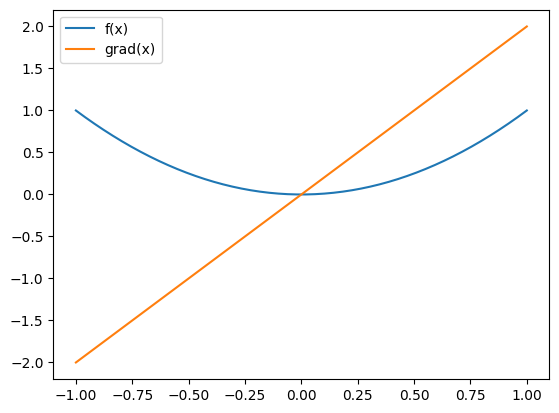

In [98]:
def f(x):
    return x ** 2

def grad(x):
    return 2 * x


fig, ax = plt.subplots()
x = np.linspace(-1, 1)
ax.plot(x, f(x), label="f(x)")
ax.plot(x, grad(x), label="grad(x)")
ax.legend()
fig.show()

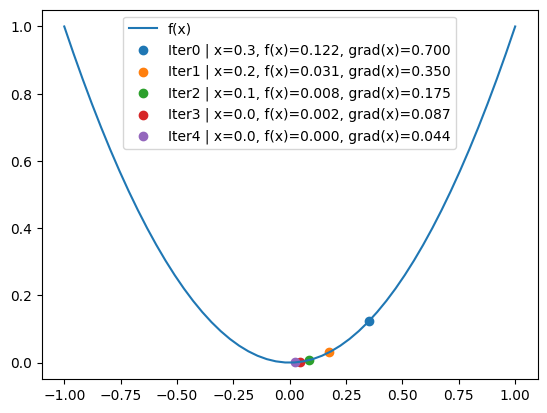

In [95]:
def f(x):
    return x ** 2

def grad(x):
    return 2 * x


fig, ax = plt.subplots()
x = np.linspace(-1, 1)
ax.plot(x, f(x), label="f(x)")

x = 0.7
for i in range(5):
    x = x - (f(x) / grad(x))
    ax.scatter(x, f(x), label=f"Iter{i} | x={x:.1f}, f(x)={f(x):.3f}, grad(x)={grad(x):.3f}")
ax.legend()
fig.show()

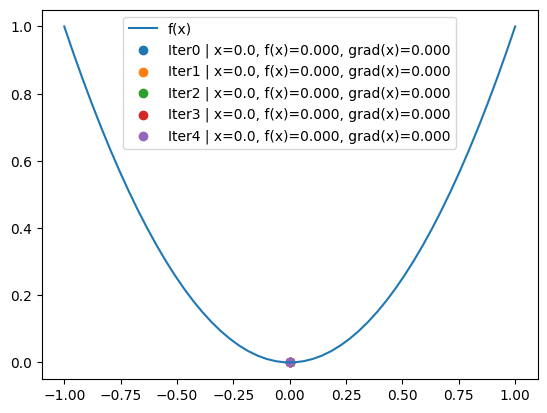

In [96]:
def hess(x):
    return 2

fig, ax = plt.subplots()
x = np.linspace(-1, 1)
ax.plot(x, f(x), label="f(x)")

x = 0.7
for i in range(5):
    x = x - (grad(x) / hess(x))
    ax.scatter(x, f(x), label=f"Iter{i} | x={x:.1f}, f(x)={f(x):.3f}, grad(x)={grad(x):.3f}")
ax.legend()
fig.show()